In [1]:
from pool import AMMPool, AMMPoolHistory, CPMM, AMMWithBaulking

In [2]:
import pandas as pd 
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
import sysconfig
print(sysconfig.get_python_version())

3.10


**Define Pools to study and initialize**

In [78]:
# Define token1=USDC and token0=WETH
token1 = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
token0 = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'

**Get Uni trades stream**  

In [5]:
from datastreams.datastream import Streamer

query_size = 10000

# instantiate Streamer object. 
# Note - unlike the cow queries, univ3 does not require multiple streamer instantations because the swaps field path is reset each iteration. 
# If the Cow queries were updated to use the same method, we could use the same streamer object for all queries.
univ3_ds = Streamer('https://api.thegraph.com/subgraphs/name/messari/uniswap-v3-ethereum')

# get a query field path from the query dictionary which is automatically populated in the Streamer object
uni_swaps_fp = univ3_ds.queryDict.get('swaps')

# define query path and parameters 
uni_swaps_qp = uni_swaps_fp(
        first=query_size, 
        orderBy='timestamp',
        orderDirection='asc',
        where = {'timestamp_gt':1643673600, 'pool': '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8'} 
        )

# run query
uni_swaps_df = univ3_ds.runQuery(uni_swaps_qp)

FIELD - swaps


In [6]:
uni_swaps_df.dtypes

swaps_id               object
swaps_hash             object
swaps_nonce             int64
swaps_logIndex          int64
swaps_gasLimit          int64
swaps_gasUsed          object
swaps_gasPrice          int64
swaps_protocol_id      object
swaps_account_id       object
swaps_pool_id          object
swaps_blockNumber       int64
swaps_timestamp         int64
swaps_tick              int64
swaps_tokenIn_id       object
swaps_amountIn         object
swaps_amountInUSD     float64
swaps_tokenOut_id      object
swaps_amountOut        object
swaps_amountOutUSD    float64
endpoint               object
dtype: object

In [7]:
uni_swaps_df.head(5)

,swaps_id,swaps_hash,swaps_nonce,swaps_logIndex,swaps_gasLimit,swaps_gasUsed,swaps_gasPrice,swaps_protocol_id,swaps_account_id,swaps_pool_id,swaps_blockNumber,swaps_timestamp,swaps_tick,swaps_tokenIn_id,swaps_amountIn,swaps_amountInUSD,swaps_tokenOut_id,swaps_amountOut,swaps_amountOutUSD,endpoint
0,0xc500098c60135dfa8c5aded8a9ffddf95d0422993007...,0xc500098c60135dfa8c5aded8a9ffddf95d0422993007...,7236,66,1200000,None,243310839517,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x60b86af869f23aeb552fb7f3cabd11b829f6ab2f,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116768,1643673723,197369,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,127681606843910411476,343127.995251,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,341883139095,341883.139095,uniswap-v3-ethereum
1,0x61b6e708eae24a14f75614fed90d53343a08d844789f...,0x61b6e708eae24a14f75614fed90d53343a08d844789f...,34,239,630062,None,139345402218,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xb6398fad2f8d238afd3a522a8ceafd400e71ef62,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116795,1643673948,197369,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1097382974817921891,2945.362647,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2936510663,2936.510663,uniswap-v3-ethereum
2,0x78cf3e16e65e25d456192ad57c1bb665534fe7c38cc3...,0x78cf3e16e65e25d456192ad57c1bb665534fe7c38cc3...,8187,147,380178,None,171184009666,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x30d6c6419cff37c41d93605b2d4d3c79329dc5b3,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116802,1643674049,197352,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,457538400000,457538.400000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,169817246222135447688,455782.502709,uniswap-v3-ethereum
3,0xfeab49f705dfe5667373cedeb8af0b4608547131b98e...,0xfeab49f705dfe5667373cedeb8af0b4608547131b98e...,2505,49,380178,None,195208384468,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x316c8fa8607ba1be5eb12c2c02b811b48c86778e,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116806,1643674124,197341,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,304930800000,304930.800000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,113017931108396951560,303845.861151,uniswap-v3-ethereum
4,0xb2daa53ef2e9329bb47bd8f56f04c7a8fb87d92d8398...,0xb2daa53ef2e9329bb47bd8f56f04c7a8fb87d92d8398...,11433,115,1200000,None,176045958490,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xd006ad343886254359dc87aa5e1753446072fd50,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116808,1643674146,197297,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,762505891677,762505.891677,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,281845732056918124330,758584.016556,uniswap-v3-ethereum


In [8]:
# Find the first and last value in the timestamp column
first_timestamp_uni = uni_swaps_df['swaps_timestamp'].min()
last_timestamp_uni = uni_swaps_df['swaps_timestamp'].max()
print(first_timestamp_uni, last_timestamp_uni)

1643673723 1645732238


**get chainlink pricing to value pools**

In [9]:
# load streamer class
chain_ds = Streamer('https://api.thegraph.com/subgraphs/name/openpredict/chainlink-prices-subgraph')
chain_price_feed = "ETH/USD"
chain_dfs_list = []

In [10]:
# get a query field path from the query dictionary which is automatically populated in the Streamer object
chain_fp = chain_ds.queryDict.get('prices')

# add parameters to the settlements_qp.
chain_qp = chain_fp(
    first= 10000,
    orderBy='timestamp',
    orderDirection='asc',
    where = {'timestamp_gt':1643673600, 'assetPair': chain_price_feed}
    )

# run query
chain_df = chain_ds.runQuery(chain_qp)

FIELD - prices


In [11]:
# drop prices_id, endpoint. 
chain_df = chain_df.drop(['prices_id', 'endpoint'], axis=1)
# divide prices_price by 1e8 to get the price in USD
chain_df['prices_price'] = chain_df['prices_price'] / 10 ** 8

In [12]:
chain_df.shape

(10000, 3)

In [13]:
chain_df.head(5)

,prices_assetPair_id,prices_timestamp,prices_price
0,ETH/USD,1643676926,2691.315867
1,ETH/USD,1643680542,2686.346068
2,ETH/USD,1643683201,2700.412022
3,ETH/USD,1643684135,2711.714351
4,ETH/USD,1643685147,2731.076527


In [14]:
print(chain_df.columns) 

Index(['prices_assetPair_id', 'prices_timestamp', 'prices_price'], dtype='object')


In [15]:
# Find the first and last value in the timestamp column
first_timestamp = chain_df['prices_timestamp'].min()
last_timestamp = chain_df['prices_timestamp'].max()
print(first_timestamp, last_timestamp)

1643676926 1657307781


In [16]:
timestamps = pd.DataFrame({'prices_timestamp': range(first_timestamp, last_timestamp + 1)})

In [17]:
timestamps.shape

(13630856, 1)

In [18]:
chain_df = pd.merge(timestamps, chain_df, on='prices_timestamp', how='left')

In [19]:
chain_df.head(5)

,prices_timestamp,prices_assetPair_id,prices_price
0,1643676926,ETH/USD,2691.315867
1,1643676927,NaN,NaN
2,1643676928,NaN,NaN
3,1643676929,NaN,NaN
4,1643676930,NaN,NaN


In [20]:
# Forward-fill missing values
chain_df.fillna(method='ffill', inplace=True)
print(chain_df.shape)
chain_df

(13630856, 3)


,prices_timestamp,prices_assetPair_id,prices_price
0,1643676926,ETH/USD,2691.315867
1,1643676927,ETH/USD,2691.315867
2,1643676928,ETH/USD,2691.315867
3,1643676929,ETH/USD,2691.315867
4,1643676930,ETH/USD,2691.315867
...,...,...,...
13630851,1657307777,ETH/USD,1222.793400
13630852,1657307778,ETH/USD,1222.793400
13630853,1657307779,ETH/USD,1222.793400
13630854,1657307780,ETH/USD,1222.793400


In [55]:
price_s = chain_df.set_index("prices_timestamp")["prices_price"] / 1000
price_s.head()

prices_timestamp
1643676926    2.691316
1643676927    2.691316
1643676928    2.691316
1643676929    2.691316
1643676930    2.691316
Name: prices_price, dtype: float64

**get initialization price**

In [68]:
# chainlink at first_timestamp of uni trades:
initialization_df = chain_df[chain_df["prices_timestamp"] == first_timestamp]
initilizatioin_price = initialization_df.iloc[0,2]
initilizatioin_price

2691.31586673

In [108]:
USDC_reserves_USD = 100000000


token1_start = USDC_reserves_USD*10**6
print(f"Token 1 (microUSDC) initializer:\t{token1_start}")
token0_start = int(USDC_reserves_USD/initilizatioin_price)*(10**9)
print(f"Token 0 (nanoWETH) initializer: \t{token0_start}")

Token 1 (microUSDC) initializer:	100000000000000
Token 0 (nanoWETH) initializer: 	37156000000000


**1.Simple AMM. SWAP ALL** 

In [109]:
# Create an instance of AMMPoolHistory 
feedlot1 = AMMPoolHistory(token0_start, token1_start)
# sanity check: should be USDC/WETH price
print(feedlot1.reserves[1] / feedlot1.reserves[0] * (10**3) )

2691.355366562601


In [110]:
# Instantiate the CPMM object with the AMMPool object
cpmm = CPMM(pool=feedlot1)
cpmm_SI_flow = AMMWithBaulking(cpmm, price_s)
print(cpmm_SI_flow.amm.pool.reserves[1] / cpmm_SI_flow.amm.pool.reserves[0])

2.691355366562601


In [111]:
# Iterate through the rows of the dataframe
for index, row in uni_swaps_df.iterrows():
    ts = row['swaps_timestamp']
    if ts < 1643676926: continue # wait until we have chainlink prices
    # Determine if the swap is a buy or a sell
    token_in = row['swaps_tokenIn_id']
    token_out = row['swaps_tokenOut_id']
    is_buy = token_in == token0 and token_out == token1
    amt = row['swaps_amountIn']
    
    # Extract the amountIn, amountOut, and timestamp
    if is_buy:
        token = 0
        amt /= 1000000000 # adjust because we shaved off 9 decimals
    else:
        token = 1 
     
    
    # Run the swap function on the AMM pool
    amt0, amt1 = cpmm_SI_flow.maybe_market_order_sell(amt,token,ts)
    print(f"Traded {amt0} for {amt1}\tat time {ts}.")
    #print(f"Pool reserves: ({feedlot1.reserves[0], feedlot1.reserves[1]})")

Traded -8692469962 for 23400000000	at time 1643677266.
Pool reserves: ((37147307530038, 100023400000000))
Traded -92524610529 for 249755238047	at time 1643677640.
Pool reserves: ((37054782919509, 100273155238047))
Traded -46134790564 for 125000000000	at time 1643677829.
Pool reserves: ((37008648128945, 100398155238047))
Traded 4981789650.19138 for -13512927312	at time 1643677886.
Pool reserves: ((37013629918595.19, 100384642310735))
Traded 7344011149.985071 for -19913736840	at time 1643678003.
Pool reserves: ((37020973929745.17, 100364728573895))
Traded -3688276367 for 10000000000	at time 1643678182.
Pool reserves: ((37017285653378.17, 100374728573895))
Traded -2781951212 for 7544004915	at time 1643678222.
Pool reserves: ((37014503702166.17, 100382272578810))
Traded -423757505 for 1149231361	at time 1643678488.
Pool reserves: ((37014079944661.17, 100383421810171))
Traded -67881703625 for 184435693324	at time 1643679112.
Pool reserves: ((36946198241036.17, 100567857503495))
Traded 42701

Traded -1027874621 for 3264021756	at time 1644246511.
Pool reserves: ((34205937760690.008, 108624415622201))
Traded -798726112 for 2536494799	at time 1644246674.
Pool reserves: ((34205139034578.008, 108626952117000))
Traded -1807988984 for 5742023565	at time 1644246708.
Pool reserves: ((34203331045594.008, 108632694140565))
Traded -156638554210 for 499786231935	at time 1644246708.
Pool reserves: ((34046692491384.008, 109132480372500))
Traded -467957262 for 1500000000	at time 1644246860.
Pool reserves: ((34046224534122.008, 109133980372500))
Traded 64367768160.21826 for -205939277886	at time 1644247091.
Pool reserves: ((34110592302282.227, 108928041094614))
Traded 1127591362.5900352 for -3600707283	at time 1644247110.
Pool reserves: ((34111719893644.816, 108924440387331))
Traded 247219677419.3286 for -783733879793	at time 1644247110.
Pool reserves: ((34358939571064.145, 108140706507538))
Traded 45000000000.0 for -141446934668	at time 1644247208.
Pool reserves: ((34403939571064.145, 1079

Traded 0 for 0	at time 1644920608.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921204.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921277.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921280.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921291.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921301.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921613.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 0 for 0	at time 1644921719.
Pool reserves: ((34072820275775.29, 109048795200227))
Traded 5313165403.152789 for -17001937236	at time 1644921787.
Pool reserves: ((34078133441178.44, 109031793262991))
Traded 0 for 0	at time 1644921787.
Pool reserves: ((34078133441178.44, 109031793262991))
Traded 0 for 0	at time 1644921787.
Pool reserves: ((34078133441178.44, 109031793262

Traded 0 for 0	at time 1645546670.
Pool reserves: ((38232433690186.695, 97184501262289))
Traded -180762088009 for 461668899962	at time 1645547208.
Pool reserves: ((38051671602177.695, 97646170162251))
Traded 1900000000.0 for -4875435221	at time 1645547672.
Pool reserves: ((38053571602177.695, 97641294727030))
Traded 2610000000.0 for -6696514692	at time 1645547733.
Pool reserves: ((38056181602177.695, 97634598212338))
Traded 7036101650.264389 for -18048052662	at time 1645548022.
Pool reserves: ((38063217703827.96, 97616550159676))
Traded 4926558713.611118 for -12632968459	at time 1645548110.
Pool reserves: ((38068144262541.57, 97603917191217))
Traded -54408092096 for 139698000000	at time 1645548630.
Pool reserves: ((38013736170445.57, 97743615191217))
Traded -66581515702 for 171499500000	at time 1645548635.
Pool reserves: ((37947154654743.57, 97915114691217))
Traded -28380551385 for 73285200000	at time 1645548640.
Pool reserves: ((37918774103358.57, 97988399891217))
Traded 108663690253.

In [112]:
results1 = pd.DataFrame(feedlot1.history)
results1.head()

<Axes: >

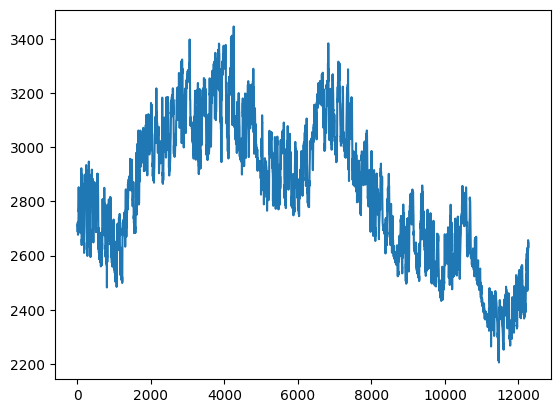

In [117]:
prices=(results1["reserve1"] / results1["reserve0"]) * 1000
prices.plot()

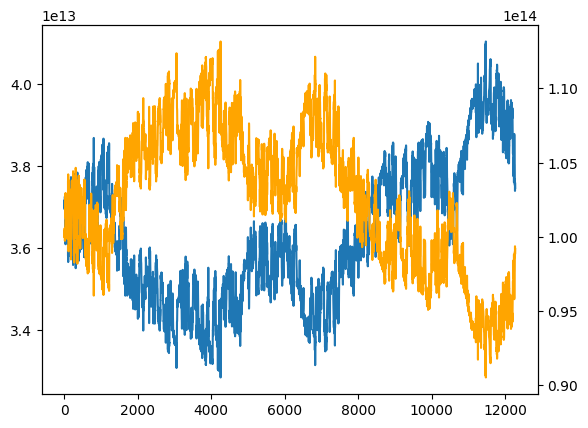

In [116]:
ax0 =results1["reserve0"].plot()
ax1 = ax0.twinx()
ax1 =results1["reserve1"].plot(color="orange")

In [ ]:
merged1_df = pd.merge(results1, chain_df, left_on='ts', right_on='prices_timestamp')
merged1_df.rename(columns={'prices_price': 'chainlink_price'}, inplace=True)

In [ ]:
merged1_df

In [ ]:
merged1_df['value'] = (merged1_df['reserve1']*merged1_df['chainlink_price']/(10**18)) + merged1_df['reserve0']/(10**18)

In [ ]:
merged1_df

In [ ]:
merged1_df.isna().sum()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['value'])
ax.set_title('Value vs. Timestamp')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)


In [ ]:
fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['reserve0'])
ax.set_title('CPMM reserves0')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

In [ ]:
fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['reserve1'])
ax.set_title('CPMM reserves1')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

In [ ]:
import matplotlib.pyplot as plt

# Assume that df is your dataframe with three columns: time, col1, and col2

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot col1 on the first y-axis
ax.plot(merged1_df["ts"], merged1_df["reserve0"], label="reserve0")

# Create a second y-axis on the right-hand side
ax2 = ax.twinx()

# Plot col2 on the second y-axis
ax2.plot(merged1_df["ts"], merged1_df["reserve1"], color="orange", label="col2")

# Add legends and axis labels
ax.set_xlabel("Timestamp")
ax.set_ylabel("reserve0")
ax2.set_ylabel("reserve1")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()


**OraclePool AMM**

**get cow trades for oracle pricing** 

In [ ]:
cow_ds = Streamer('https://api.thegraph.com/subgraphs/name/cowprotocol/cow')

# get COW trades 

trades_fp = cow_ds.queryDict.get('trades')

# trades query path that gets token a -> token b trades
trades_qp = trades_fp(
    first=10000,
    orderBy='timestamp',
    orderDirection='asc',
    where={'timestamp_gt':1643673600, 'sellToken':'0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
           'buyToken':'0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
    }
)

# run query
trades_df = cow_ds.runQuery(trades_qp)

In [ ]:
trades_df.shape

In [ ]:
trades_df.head(5)

In [ ]:
# Set query size large enough to retrieve all tokens in the graph
query_size = 10000

token_fp = cow_ds.queryDict.get('tokens')

# add parameters to the settlements_qp.
token_qp = token_fp(
    first=query_size,
)

# run query
token_df = cow_ds.runQuery(token_qp)


In [ ]:
token_df.shape

In [ ]:
# Merge1 on sell token address.  x = sell token 

merged_df = pd.merge(trades_df, token_df, left_on='trades_sellToken_id', right_on='tokens_address')

merged_df.shape

In [ ]:
# Merge2 on buy token address.  y = buy token 
cow_df = pd.merge(merged_df, token_df, left_on='trades_buyToken_id', right_on='tokens_address')

cow_df.shape

In [ ]:
cow_df.dtypes

In [ ]:
# calculate buy and sell amounts from the correct decimal 
cow_df['sell_amount'] = cow_df.apply(lambda x: x['trades_sellAmount'] / (10**x['tokens_decimals_x']), axis=1)
cow_df['buy_amount'] = cow_df.apply(lambda x: x['trades_buyAmount'] / (10**x['tokens_decimals_y']), axis=1)

In [ ]:
# calculate COW price defined sell amount / buy amount
cow_df['cow_price'] = cow_df['sell_amount'] / cow_df['buy_amount']

In [ ]:
cow_df

In [ ]:
# Find the first and last value in the timestamp column
first_timestamp_cow = chain_df['prices_timestamp'].min()
last_timestamp_cow = chain_df['prices_timestamp'].max()

In [ ]:
first_timestamp_cow

In [ ]:
last_timestamp_cow

In [ ]:
oracle_dict = [{"ts": row["trades_timestamp"], "p": row["cow_price"]} for _, row in cow_df.iterrows()]

In [ ]:
oracle_dict

**Oracle pool simulation**

In [ ]:
from pool import CPMM, AMMPool, SwapRejectedError, OraclePool

In [ ]:
# Create an instance of AMMPoolHistory 
feedlot2 = AMMPoolHistory(token0_start, token1_start)

In [ ]:
feedlot3 = OraclePool(feedlot2, oracle_dict)

In [ ]:
 # Iterate through the rows of the dataframe
for index, row in uni_swaps_df.iterrows():
    # Determine if the swap is a buy or a sell
    token_in = row['swaps_tokenIn_id']
    token_out = row['swaps_tokenOut_id']
    is_buy = token_in == token0 and token_out == token1
    amt = row['swaps_amountIn']
    
    # Extract the amountIn, amountOut, and timestamp
    if is_buy:
        token = 0
    else:
        token = 1 
    ts = row['swaps_timestamp']
    
    print('token', token)
    print('amt', amt)
    print('amt',amt/10**18)
    print('token_in', token_in)
    print('ts', ts)
    
    # Run the swap function on the AMM pool
    feedlot3.market_order_sell(amt,token,ts)

In [ ]:
results2 = pd.DataFrame(feedlot2.history)

In [ ]:
results2.shape

In [ ]:
results2.head(5)

In [ ]:
merged2_df = pd.merge(results2, chain_df, left_on='ts', right_on='prices_timestamp')
merged2_df.rename(columns={'prices_price': 'chainlink_price'}, inplace=True)

In [ ]:
merged2_df['value'] = merged2_df['reserve1']*merged2_df['chainlink_price']/10**18 + merged2_df['reserve0']/10**18

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(merged2_df['ts'], merged2_df['value'])
ax.set_title('Value vs. Timestamp')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

In [ ]:
# Assume that df is your dataframe with three columns: time, col1, and col2

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot col1 on the first y-axis
ax.plot(merged2_df["ts"], merged2_df["reserve0"], label="reserve0")

# Create a second y-axis on the right-hand side
ax2 = ax.twinx()

# Plot col2 on the second y-axis
ax2.plot(merged2_df["ts"], merged2_df["reserve1"], color="orange", label="reserves1")

# Add legends and axis labels
ax.set_xlabel("Timestamp")
ax.set_ylabel("reserve0")
ax2.set_ylabel("reserve1")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()